In [1]:
import pandas as pd
import random
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import numpy as np

# Constants for data generation
locations = [
    "Dallas", "Atlanta", "New York", "Philadelphia", "Washington",
    "San Francisco", "Los Angeles", "Seattle", "Chicago", "San Diego",
    "Miami", "Boston", "Detroit", "Phoenix", "Houston"
]
job_titles = [
    "RegisteredNurse_ICU", "RegisteredNurse_MedSurg", "RegisteredNurse_Telemetry",
    "RegisteredNurse_Oncology", "RegisteredNurse_Pediatric", "PhysioTherapist",
    "LabTechnician", "RegisteredNurse_CriticalCare", "RegisteredNurse_Cardiology",
    "RegisteredNurse_Surgery"
]
hospital_suffixes = ["Corporate", "NonProfit", "Community", "Veterans", "Govt"]
flu_season_months = [10, 11, 12, 1, 2]
num_rows = 250000  # Adjust for sample; change to 250000 for full dataset

# Quality of Life Index for each location
quality_of_life_index = [
    191.8, 185.1, 133.5, 160.5, 171.1, 170.3, 143.1,
    197.1, 155.9, 189.6, 161.2, 180.9, 155.1, 169.1, 171.6
]

# Normalize QoL index
min_qol = min(quality_of_life_index)
max_qol = max(quality_of_life_index)
normalized_qol = [(1 - (qol - min_qol) / (max_qol - min_qol)) for qol in quality_of_life_index]

# Map location to QoL index multiplier
qol_multiplier = {locations[i]: 1 + (normalized_qol[i] - 0.5) * 0.1 for i in range(len(locations))}

# Functions to generate specific data points
def generate_location():
    return random.choice(locations)

def generate_hospital_name(city):
    return f"{city} {random.choice(hospital_suffixes)}"

def generate_contract_dates():
    start_date = datetime(2023, 1, 1) + timedelta(days=random.randint(0, 729))
    end_date = start_date + timedelta(weeks=random.randint(1, 13))
    return start_date, end_date

def generate_hourly_rate_with_specialization(job_title, month, location):
    # Specialized roles get higher base rate
    if "Oncology" in job_title or "Cardiology" in job_title or "Surgery" in job_title:
        base_rate = random.uniform(45, 65)
    else:
        base_rate = random.uniform(30, 50)

    # Apply seasonal uptick for flu season and holidays
    if month in [10, 11, 12, 1, 2]:
        base_rate *= 1.2  # Applying a 20% increase

    # Apply QoL multiplier
    base_rate *= qol_multiplier[location]

    return round(base_rate, 2)

# Generating the synthetic dataset with QoL adjustments
data = []
for _ in range(num_rows):
    city = generate_location()
    job_title = random.choice(job_titles)
    hospital_name = generate_hospital_name(city)
    contract_start, contract_end = generate_contract_dates()
    hourly_rate = generate_hourly_rate_with_specialization(job_title, contract_start.month, city)

    data.append([
        job_title,
        city,
        hospital_name,
        contract_start.strftime('%Y-%m-%d'),
        contract_end.strftime('%Y-%m-%d'),
        hourly_rate
    ])

# Creating a DataFrame
columns = ["Job Title", "Location", "Hospital Name", "Contract Start Date", "Contract End Date", "Hourly Pay Rate"]
df = pd.DataFrame(data, columns=columns)

# Display the first few rows
df.head()

,Job Title,Location,Hospital Name,Contract Start Date,Contract End Date,Hourly Pay Rate
0,RegisteredNurse_Telemetry,Houston,Houston Veterans,2023-01-03,2023-03-07,37.96
1,LabTechnician,Phoenix,Phoenix NonProfit,2024-12-08,2025-03-02,36.54
2,LabTechnician,New York,New York Veterans,2023-02-21,2023-04-25,47.32
3,RegisteredNurse_CriticalCare,Atlanta,Atlanta NonProfit,2023-04-17,2023-07-03,43.89
4,RegisteredNurse_CriticalCare,Boston,Boston NonProfit,2024-01-13,2024-03-09,44.31


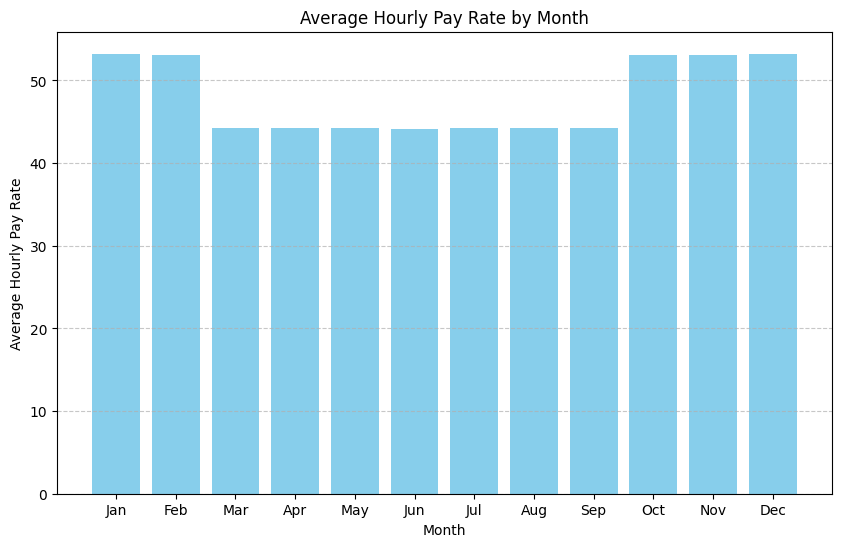

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert the contract start date to datetime format to extract the month
df['Contract Start Date'] = pd.to_datetime(df['Contract Start Date'])
df['Month'] = df['Contract Start Date'].dt.month

# Calculate the average hourly pay rate for each month
monthly_avg_pay = df.groupby('Month')['Hourly Pay Rate'].mean().reset_index()

# Plotting the monthly average pay rate
plt.figure(figsize=(10, 6))
plt.bar(monthly_avg_pay['Month'], monthly_avg_pay['Hourly Pay Rate'], color='skyblue')

# Adding labels and title
plt.xticks(range(1, 13), labels=[
    "Jan", "Feb", "Mar", "Apr", "May", "Jun",
    "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"
])
plt.xlabel('Month')
plt.ylabel('Average Hourly Pay Rate')
plt.title('Average Hourly Pay Rate by Month')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


<ipython-input-3-080a41208c53>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-3-080a41208c53>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-3-080a41208c53>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-3-080a41208c53>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-3-080a41208c53>:21: FutureWarning: 

Passing `palette

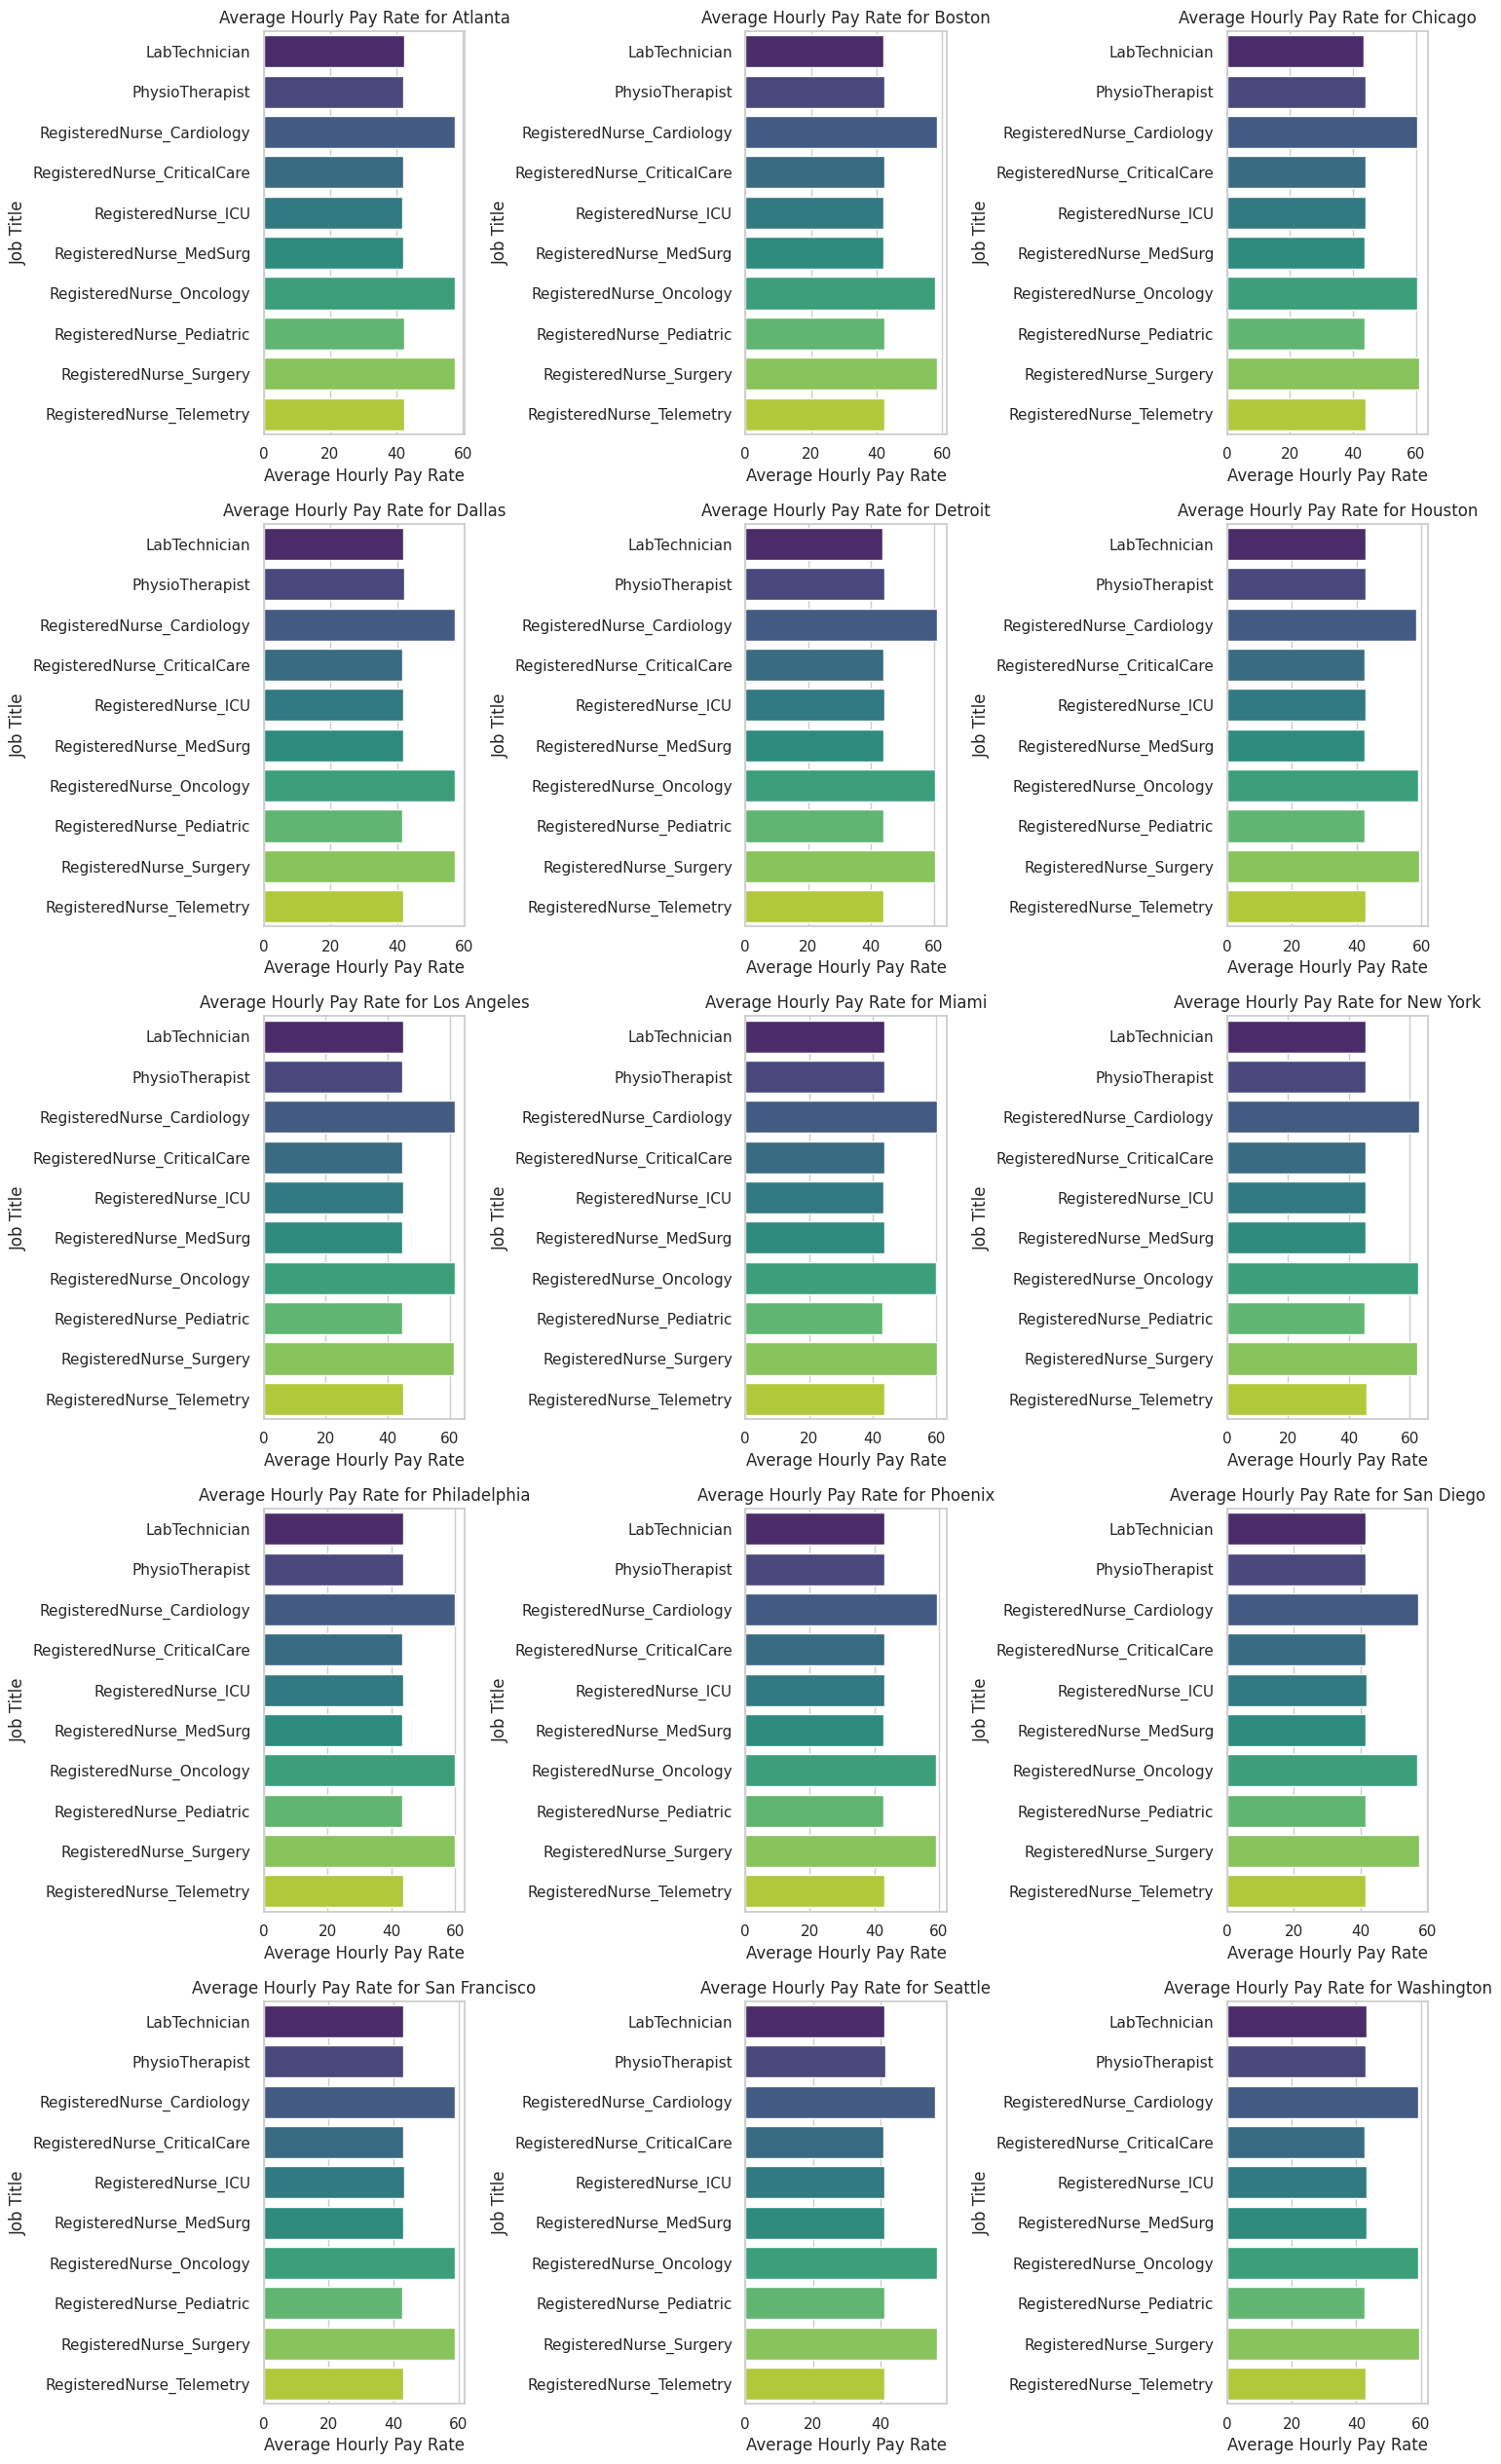

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the average hourly pay rate for each job title and location
citywise_avg_pay = df.groupby(['Location', 'Job Title'])['Hourly Pay Rate'].mean().reset_index()

# Set up the plotting style
sns.set(style="whitegrid")

# Get the unique locations for city-wise plotting
locations = citywise_avg_pay['Location'].unique()

# Set the size for the overall figure
plt.figure(figsize=(15, 30))

# Create a separate bar plot for each city
for i, city in enumerate(locations, 1):
    plt.subplot(len(locations) // 3 + 1, 3, i)  # Arrange in a grid layout
    city_data = citywise_avg_pay[citywise_avg_pay['Location'] == city]

    sns.barplot(
        data=city_data,
        x='Hourly Pay Rate',
        y='Job Title',
        palette='viridis'
    )
    plt.title(f'Average Hourly Pay Rate for {city}')
    plt.xlabel('Average Hourly Pay Rate')
    plt.ylabel('Job Title')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


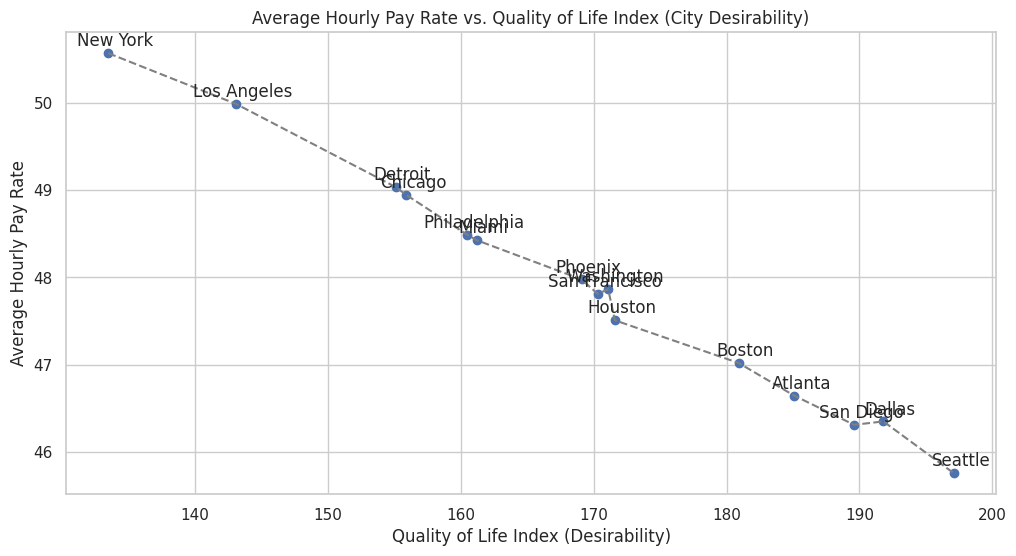

In [4]:
import matplotlib.pyplot as plt
import pandas as pd

# Define locations and their corresponding Quality of Life Index values
locations = [
    "Dallas", "Atlanta", "New York", "Philadelphia", "Washington",
    "San Francisco", "Los Angeles", "Seattle", "Chicago", "San Diego",
    "Miami", "Boston", "Detroit", "Phoenix", "Houston"
]

quality_of_life_index = [
    191.8, 185.1, 133.5, 160.5, 171.1, 170.3, 143.1,
    197.1, 155.9, 189.6, 161.2, 180.9, 155.1, 169.1, 171.6
]

# Create a mapping of locations to their quality of life indices
qol_mapping = dict(zip(locations, quality_of_life_index))

# Calculate average hourly pay rate for each city
avg_hourly_rate_by_city = df.groupby("Location")["Hourly Pay Rate"].mean()

# Prepare data for plotting with correct mapping
city_qol_data = pd.DataFrame({
    "Location": avg_hourly_rate_by_city.index,
    "Quality of Life Index": [qol_mapping[city] for city in avg_hourly_rate_by_city.index],
    "Average Hourly Pay Rate": avg_hourly_rate_by_city.values
}).sort_values(by="Quality of Life Index")

# Plot hourly pay rates against Quality of Life Index
plt.figure(figsize=(12, 6))
plt.scatter(city_qol_data["Quality of Life Index"], city_qol_data["Average Hourly Pay Rate"], color='b', marker='o')
plt.plot(city_qol_data["Quality of Life Index"], city_qol_data["Average Hourly Pay Rate"], linestyle='--', color='gray')

# Adding labels and title
plt.xlabel("Quality of Life Index (Desirability)")
plt.ylabel("Average Hourly Pay Rate")
plt.title("Average Hourly Pay Rate vs. Quality of Life Index (City Desirability)")
plt.grid(True)

# Annotate each city on the plot for clarity
for i in range(len(city_qol_data)):
    plt.annotate(city_qol_data["Location"].iloc[i],
                 (city_qol_data["Quality of Life Index"].iloc[i], city_qol_data["Average Hourly Pay Rate"].iloc[i]),
                 textcoords="offset points", xytext=(5, 5), ha='center')

plt.show()


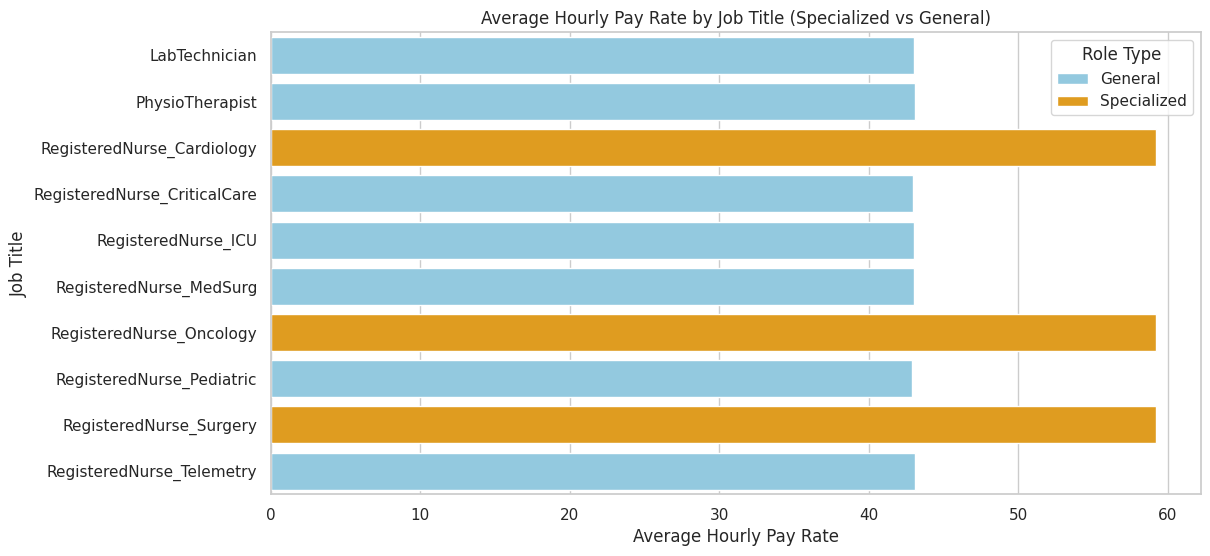

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the average hourly pay rate for each job title
job_title_avg_pay = df.groupby('Job Title')['Hourly Pay Rate'].mean().reset_index()

# Highlight specialized roles
specialized_roles = ["RegisteredNurse_Oncology", "RegisteredNurse_Cardiology", "RegisteredNurse_Surgery"]
job_title_avg_pay['Specialized'] = job_title_avg_pay['Job Title'].apply(lambda x: 'Specialized' if x in specialized_roles else 'General')

# Set up the plotting style
sns.set(style="whitegrid")

# Plotting the average pay by job title
plt.figure(figsize=(12, 6))
sns.barplot(
    data=job_title_avg_pay,
    x='Hourly Pay Rate',
    y='Job Title',
    hue='Specialized',
    palette={'Specialized': 'orange', 'General': 'skyblue'}
)
plt.title('Average Hourly Pay Rate by Job Title (Specialized vs General)')
plt.xlabel('Average Hourly Pay Rate')
plt.ylabel('Job Title')
plt.legend(title="Role Type")
plt.show()


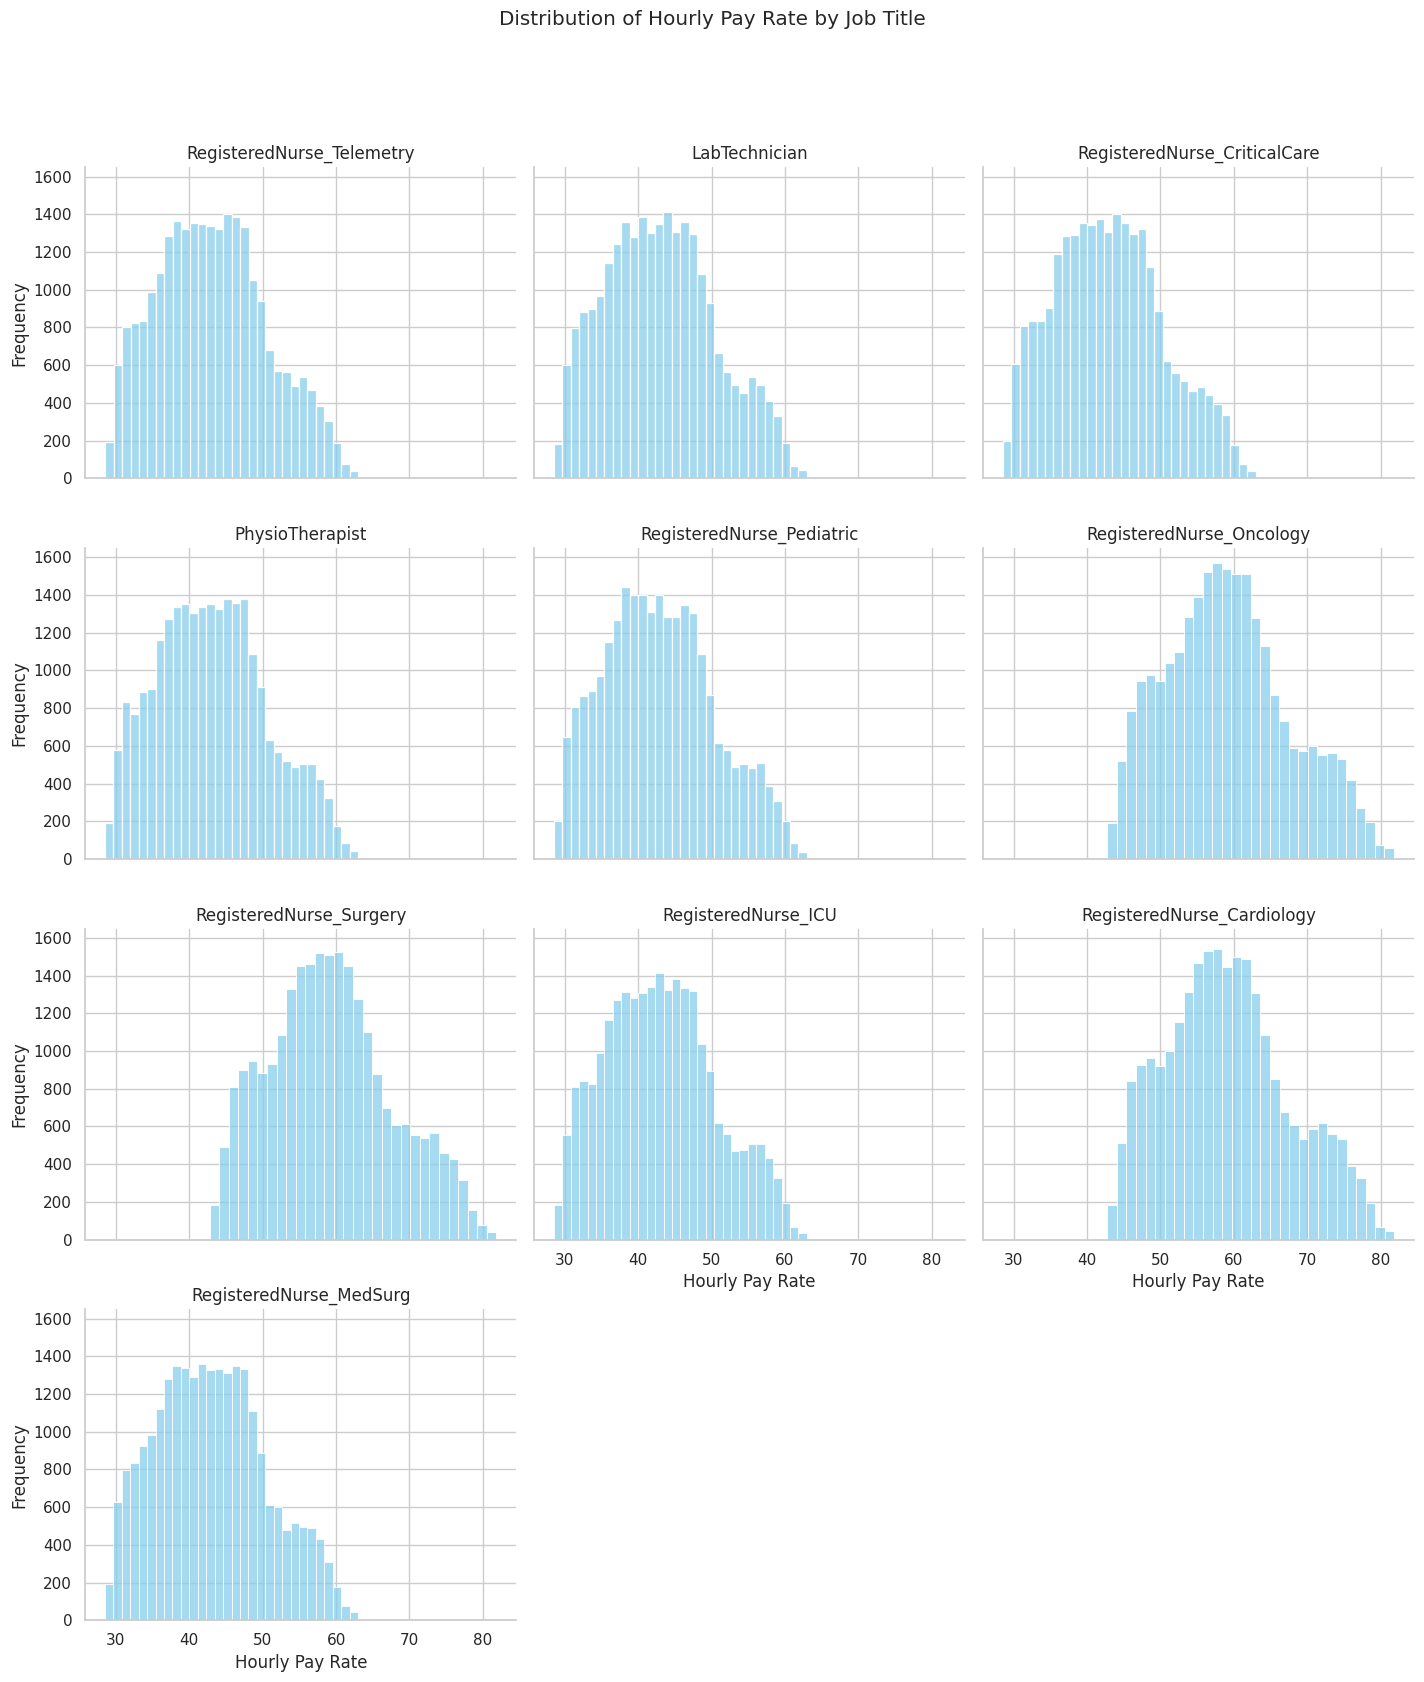

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plotting style
sns.set(style="whitegrid")

# Creating a FacetGrid to plot a separate histogram for each job title
g = sns.FacetGrid(df, col='Job Title', col_wrap=3, height=4, aspect=1.2, sharex=True, sharey=True)
g.map(sns.histplot, 'Hourly Pay Rate', bins=30, color='skyblue')

# Adding labels and titles
g.set_axis_labels("Hourly Pay Rate", "Frequency")
g.set_titles("{col_name}")
g.fig.suptitle('Distribution of Hourly Pay Rate by Job Title', y=1.05)
plt.tight_layout()
plt.show()


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import pandas as pd
import joblib

# Step 1: Data Preparation
# Extracting month from Contract Start Date
df["Contract Start Month"] = pd.to_datetime(df["Contract Start Date"]).dt.month

# Binary feature for flu season
df["Flu Season"] = df["Contract Start Month"].apply(lambda x: 1 if x in flu_season_months else 0)

# Selecting features and target
X = df[["Location", "Job Title", "Contract Start Month", "Flu Season"]]
y = df["Hourly Pay Rate"]

# Step 2: Encoding categorical variables and scaling numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(drop="first"), ["Location", "Job Title"]),
        ("num", StandardScaler(), ["Contract Start Month", "Flu Season"])
    ]
)

# Step 3: Model Training and Evaluation
# Define models
rf_model = Pipeline(steps=[("preprocessor", preprocessor), ("regressor", RandomForestRegressor(n_estimators=100, random_state=42))])
gb_model = Pipeline(steps=[("preprocessor", preprocessor), ("regressor", GradientBoostingRegressor(n_estimators=100, random_state=42))])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the models
rf_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)

joblib.dump(rf_model, 'rf_model.pkl')
joblib.dump(gb_model, 'gb_model.pkl')

# Predictions
rf_predictions = rf_model.predict(X_test)
gb_predictions = gb_model.predict(X_test)

# Step 4: Evaluation Metrics
rf_rmse = mean_squared_error(y_test, rf_predictions, squared=False)
rf_mae = mean_absolute_error(y_test, rf_predictions)

gb_rmse = mean_squared_error(y_test, gb_predictions, squared=False)
gb_mae = mean_absolute_error(y_test, gb_predictions)

# Results
print("Random Forest Results:")
print(f"RMSE: {rf_rmse:.2f}")
print(f"MAE: {rf_mae:.2f}")

print("\nGradient Boosting Results:")
print(f"RMSE: {gb_rmse:.2f}")
print(f"MAE: {gb_mae:.2f}")

Random Forest Results:
RMSE: 6.25
MAE: 5.37

Gradient Boosting Results:
RMSE: 6.23
MAE: 5.36


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [8]:
#!pip install streamlit
with open('app.py', 'w') as f:
    f.write("""
import streamlit as st
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import joblib

# Assuming your trained model (rf_model or gb_model) is available here
# Replace with your actual trained model
# For example:
# rf_model = ... (your trained RandomForestRegressor pipeline)

rf_model = joblib.load('rf_model.pkl')
gb_model = joblib.load('gb_model.pkl')

locations = [
    "Dallas", "Atlanta", "New York", "Philadelphia", "Washington",
    "San Francisco", "Los Angeles", "Seattle", "Chicago", "San Diego",
    "Miami", "Boston", "Detroit", "Phoenix", "Houston"
]
job_titles = [
    "RegisteredNurse_ICU", "RegisteredNurse_MedSurg", "RegisteredNurse_Telemetry",
    "RegisteredNurse_Oncology", "RegisteredNurse_Pediatric", "PhysioTherapist",
    "LabTechnician", "RegisteredNurse_CriticalCare", "RegisteredNurse_Cardiology",
    "RegisteredNurse_Surgery"
]

# Function to make predictions using your model
def predict_hourly_rate(job_title, location, contract_start_month):
    # Create a DataFrame with the input values
    input_data = pd.DataFrame({
        "Location": [location],
        "Job Title": [job_title],
        "Contract Start Month": [contract_start_month],
        "Flu Season": [1 if contract_start_month in [10, 11, 12, 1, 2] else 0]
    })

    # Use your trained model to make a prediction
    prediction = rf_model.predict(input_data)  # Replace with your model

    return prediction[0]


# Streamlit App
st.title("Hourly Rate Predictor")

# Input fields
job_title = st.selectbox("Job Title", job_titles)
location = st.selectbox("Location", locations)
contract_start_month = st.slider("Contract Start Month", 1, 12, 1)

# Prediction button
if st.button("Predict Hourly Rate"):
    try:
        predicted_rate = predict_hourly_rate(job_title, location, contract_start_month)
        st.success(f"Predicted Hourly Rate: ${predicted_rate:.2f}")
    except Exception as e:
        st.error(f"Error making prediction: {e}")
        """)

In [9]:
!pip install streamlit
!apt-get install -y cloudflared  # Install cloudflared for tunneling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 85.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 92.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.3/79.3 kB 7.0 MB/s eta 0:00:00
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
E: Unable to locate package cloudflared


In [ ]:
!streamlit run app.py & npx cloudflared tunnel --url http://localhost:8501




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.147.47.61:8501

Need to install the following packages:
  cloudflared@0.5.3
Ok to proceed? (y) y
2024-11-05T04:13:55Z INF Thank you for trying Cloudflare Tunnel. Doing so, without a Cloudflare account, is a quick way to experiment and try it out. However, be aware that these account-less Tunnels have no uptime guarantee, are subject to the Cloudflare Online Services Terms of Use (https://www.cloudflare.com/website-terms/), and Cloudflare reserves the right to investigate your use of Tunnels for violations of such terms. If you intend to use Tunnels in production you should use a pre-created named tunnel by following: https://developers.cloudflare.com/cloudflare-one/connections/connect-apps
2024-11-05T04:13:55Z INF Requesting new quick Tunnel on trycloudflare.com...
2024-11-05T04:14:00Z INF +---------------------------------------